# 01. Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid", {'axes.grid' : False})
# sns.set_style("whitegrid")

# Environment settings: 
pd.set_option('display.float_format', lambda x: f'{x:.3f}')

# import warnings
# # Suppressing a warning 
# warnings.filterwarnings("ignore") 
# warnings.warn("this will not show")

import re
import time
import random
import tempfile
from tqdm.notebook import tqdm

import gc
gc.collect()

0

# 02. Reading Clean the Data from File

In [2]:
# we are using cleaned Data
df_origin_train = pd.read_csv('/kaggle/input/creditscoreclassification/train.csv')
#df_origin_train = pd.read_csv('/kaggle/input/cleaned/credit_score_train_cleaned.csv')
df_train = df_origin_train.copy()

df_origin_test = pd.read_csv('/kaggle/input/creditscoreclassification/test.csv')
df_test = df_origin_test.copy()

df_train.shape, df_test.shape

((100000, 28), (50000, 27))

In [3]:
df_train.head(8).T

,0,1,2,3,4,5,6,7
ID,5634,5635,5636,5637,5638,5639,5640,5641
Customer_ID,3392,3392,3392,3392,3392,3392,3392,3392
Month,1,2,3,4,5,6,7,8
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh
Age,23.000,23.000,23.000,23.000,23.000,23.000,23.000,23.000
SSN,821000265.000,821000265.000,821000265.000,821000265.000,821000265.000,821000265.000,821000265.000,821000265.000
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist
Annual_Income,19114.120,19114.120,19114.120,19114.120,19114.120,19114.120,19114.120,19114.120
Monthly_Inhand_Salary,1824.843,1824.843,1824.843,1824.843,1824.843,1824.843,1824.843,1824.843
Num_Bank_Accounts,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  int64  
 1   Customer_ID               50000 non-null  int64  
 2   Month                     50000 non-null  int64  
 3   Name                      50000 non-null  object 
 4   Age                       50000 non-null  float64
 5   SSN                       50000 non-null  float64
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  float64
 8   Monthly_Inhand_Salary     50000 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  float64
 10  Num_Credit_Card           50000 non-null  float64
 11  Interest_Rate             50000 non-null  float64
 12  Num_of_Loan               50000 non-null  float64
 13  Type_of_Loan              50000 non-null  object 
 14  Delay_

In [6]:
# Drop the Columns we not use in model
df_train.drop(columns=['ID', 'Customer_ID', 'Month', 'Name', 'SSN'], inplace=True)

df_test.drop(columns=['ID', 'Customer_ID', 'Month', 'Name', 'SSN'], inplace=True)

In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.000,33.316,10.765,14.000,24.000,33.000,42.000,56.000
Annual_Income,100000.000,50505.123,38299.422,7005.930,19342.972,36999.705,71683.470,179987.280
Monthly_Inhand_Salary,100000.000,4197.271,3186.432,303.645,1626.594,3095.905,5957.715,15204.633
Num_Bank_Accounts,100000.000,5.369,2.593,0.000,3.000,5.000,7.000,11.000
Num_Credit_Card,100000.000,5.534,2.067,0.000,4.000,5.000,7.000,11.000
Interest_Rate,100000.000,14.532,8.741,1.000,7.000,13.000,20.000,34.000
Num_of_Loan,100000.000,3.533,2.446,0.000,2.000,3.000,5.000,9.000
Delay_from_due_date,100000.000,21.081,14.805,0.000,10.000,18.000,28.000,62.000
Num_of_Delayed_Payment,100000.000,13.313,6.237,0.000,9.000,14.000,18.000,25.000
Changed_Credit_Limit,100000.000,10.470,6.609,0.500,5.380,9.400,14.850,29.980


In [8]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,50000.000,33.804,10.765,14.000,25.000,33.000,42.000,56.000
Annual_Income,50000.000,50505.123,38299.614,7005.930,19342.972,36999.705,71683.470,179987.280
Monthly_Inhand_Salary,50000.000,4183.034,3175.319,303.645,1623.555,3082.272,5937.530,15204.633
Num_Bank_Accounts,50000.000,5.369,2.595,0.000,3.000,5.000,7.000,11.000
Num_Credit_Card,50000.000,5.534,2.072,0.000,4.000,5.000,7.000,11.000
Interest_Rate,50000.000,14.532,8.741,1.000,7.000,13.000,20.000,34.000
Num_of_Loan,50000.000,3.533,2.446,0.000,2.000,3.000,5.000,9.000
Delay_from_due_date,50000.000,21.067,14.806,0.000,10.000,18.000,28.000,62.000
Num_of_Delayed_Payment,50000.000,13.315,6.238,0.000,9.000,14.000,18.000,25.000
Changed_Credit_Limit,50000.000,10.465,6.606,0.500,5.380,9.410,14.810,29.980


In [9]:
df_train.select_dtypes(include="object").describe().T

,count,unique,top,freq
Occupation,100000,15,Lawyer,7096
Type_of_Loan,100000,6261,No Data,11408
Credit_Mix,100000,3,Standard,45848
Payment_of_Min_Amount,100000,3,Yes,52326
Payment_Behaviour,100000,6,Low_spent_Small_value_payments,28580
Credit_Score,100000,3,Standard,53174


In [10]:
df_test.select_dtypes(include="object").describe().T

,count,unique,top,freq
Occupation,50000,15,Lawyer,3548
Type_of_Loan,50000,6261,No Data,5704
Credit_Mix,50000,3,Standard,22924
Payment_of_Min_Amount,50000,3,Yes,26158
Payment_Behaviour,50000,6,Low_spent_Small_value_payments,14151


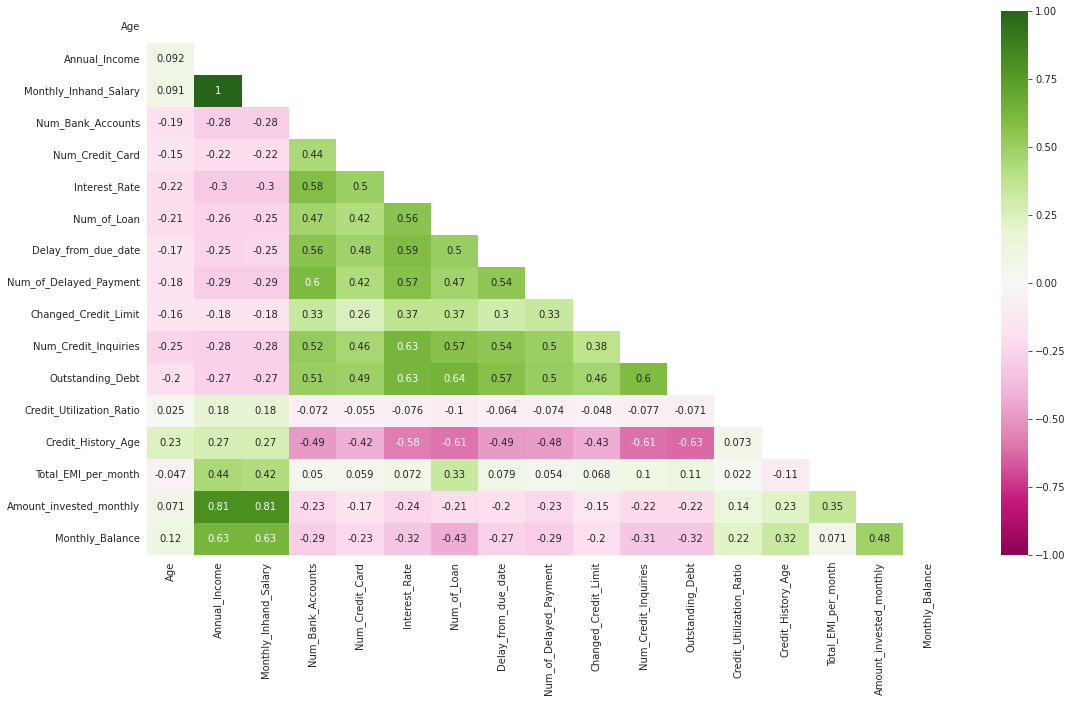

In [11]:
# Correlation between Numerical features
plt.figure(figsize=(18, 10))
sns.heatmap(
    df_train.corr(), 
    mask=np.triu(np.ones_like(df_train.corr(), dtype=bool)), 
    annot=True, vmin=-1, vmax=1, cmap="PiYG"
);

# 03. Multi-class Classification Data Pre-Processing

## Import Libraries

In [12]:
# conda install -c anaconda scikit-learn
# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

# Supervised-Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# conda install -c conda-forge xgboost
from xgboost import XGBClassifier

# Supervised-Classifier-metrics
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score, log_loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, auc
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score

# Supervised-cross_validate-GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# import pickle

random_state = 42

## Train | Test Split

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Type_of_Loan              100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  ob

In [14]:
df_train["Credit_Score"].value_counts(normalize=True).sort_index()

Good       0.178
Poor       0.290
Standard   0.532
Name: Credit_Score, dtype: float64

In [15]:
X      = df_train.drop(columns="Credit_Score")
y      = df_train['Credit_Score']
X_test = df_test

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=random_state)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, 

((80000, 22), (80000,), (20000, 22), (20000,), (50000, 22))

## Label Encoder

In [16]:
from sklearn.preprocessing import LabelEncoder

le      = LabelEncoder()
print(np.unique(y_train))
y_train = le.fit_transform(y_train)
y_val   = le.transform(y_val)

pd.DataFrame(y_train).value_counts().sort_index()

['Good' 'Poor' 'Standard']


0    14301
1    23124
2    42575
dtype: int64

In [17]:
# our focus group
le.inverse_transform([1])

array(['Poor'], dtype=object)

## Dummy Operation

https://celik-muhammed.medium.com/how-to-converting-pandas-column-of-comma-separated-strings-into-dummy-variables-762c02282a6c

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

class GetDummies(BaseEstimator, TransformerMixin): 
    def __init__(self, data_sep=',', col_name_sep='_'):
        """
        Transformer that creates dummy variables from categorical columns with a separator.
        Parameters:
            - data_sep (str): Separator used to split categorical values into multiple dummy variables.
            - col_name_sep (str): Separator used to separate the column name from the prefix in the output column names.
        """
        self.data_sep     = data_sep
        self.col_name_sep = col_name_sep
        
    # Return self nothing else to do here
    def fit(self, X, y  = None): 
        """
        Fit the transformer to the data.
        Parameters:
            - X (pandas.DataFrame): Input data with categorical columns.
            - y (array-like): Target variable (ignored).
        Returns:
            - self: Returns the transformer object.
        """
        object_cols       = X.select_dtypes(include="object").columns
        self.dummy_cols   = [col for col in object_cols if X[col].str.contains(self.data_sep, regex=True).any()]
        self.dummy_prefix = [''.join(map(lambda x: x[0], col.split(self.col_name_sep)))  if self.col_name_sep in col else col[:2]   for col in self.dummy_cols]
        
        for col, pre in zip(self.dummy_cols, self.dummy_prefix):
            dummy_X = X.join(X[col].str.get_dummies(sep=self.data_sep).add_prefix(pre+self.col_name_sep))            
            
        dummy_X.drop(columns = self.dummy_cols, inplace=True)
        self.columns = dummy_X.columns
        return self
    
    # Transformer method we wrote for this transformer
    def transform(self, X, y = None):
        """
        Transform the input data by creating dummy variables.
        Parameters:
            - X (pandas.DataFrame): Input data with categorical columns.
            - y (array-like): Target variable (ignored).
        Returns:
            - X_transformed (pandas.DataFrame): Transformed data with dummy variables.
        """
        for col, pre in zip(self.dummy_cols, self.dummy_prefix):
            X_transformed = X.join(X[col].str.get_dummies(sep=self.data_sep).add_prefix(pre+self.col_name_sep))   

        X_transformed = X_transformed.reindex(columns=self.columns, fill_value=0)          
        return X_transformed
        
    # to get feature names    
    def get_feature_names_out(self, input_features=None):
        """
        Get the names of the transformed features.
        Parameters:
            - input_features (array-like): Names of the input features (ignored).
        Returns:
            - output_features (list): Names of the transformed features.
        """
        return self.columns.tolist()

In [19]:
# check for columns containing commas
[col for col in X_train.select_dtypes('O').columns if X_train[col].str.contains(',', regex=True).any()]

['Type_of_Loan']

In [20]:
dummy = GetDummies()

X_train_dummy = dummy.fit_transform(X_train)
X_val_dummy   = dummy.transform(X_val)

X_train_dummy.shape, X_val_dummy.shape

((80000, 31), (20000, 31))

In [21]:
X_train_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 75220 to 15795
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          80000 non-null  float64
 1   Occupation                   80000 non-null  object 
 2   Annual_Income                80000 non-null  float64
 3   Monthly_Inhand_Salary        80000 non-null  float64
 4   Num_Bank_Accounts            80000 non-null  float64
 5   Num_Credit_Card              80000 non-null  float64
 6   Interest_Rate                80000 non-null  float64
 7   Num_of_Loan                  80000 non-null  float64
 8   Delay_from_due_date          80000 non-null  float64
 9   Num_of_Delayed_Payment       80000 non-null  float64
 10  Changed_Credit_Limit         80000 non-null  float64
 11  Num_Credit_Inquiries         80000 non-null  float64
 12  Credit_Mix                   80000 non-null  object 
 13  Outstanding_

## OneHotEncoder and LabelEncoder

- Nominal data represents categories without any inherent order or hierarchy. Each category is independent of others. One-hot encoding is commonly used for nominal data.

In [22]:
from sklearn.preprocessing import OneHotEncoder

cat = X_train_dummy.select_dtypes(include="object").columns.tolist()   
print('OneHotEncoder:', cat)
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

X_train_cat = pd.DataFrame(
    ohe.fit_transform(X_train_dummy[cat]), index = X_train_dummy.index, 
    columns = ohe.get_feature_names_out(cat)
)    
X_val_cat  = pd.DataFrame(
    ohe.transform(X_val_dummy[cat]), index = X_val_dummy.index, 
    columns = ohe.get_feature_names_out(cat)
)    
X_train_ohe = X_train_cat.join(X_train_dummy.select_dtypes("number"))
X_val_ohe   = X_val_cat.join(X_val_dummy.select_dtypes("number"))

X_train_ohe.shape, X_val_ohe.shape

OneHotEncoder: ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']


((80000, 54), (20000, 54))

In [23]:
X_train_ohe.columns

Index(['Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Standard', 'Payment_of_Min_Amount_NM',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments', 'Age',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Nu

## Scale data

In [24]:
scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_ohe), columns=X_train_ohe.columns)
X_val_scaled   = pd.DataFrame(scaler.transform(X_val_ohe), columns=X_val_ohe.columns)

## Define Model Evaluation Functions

In [25]:
from sklearn.metrics import confusion_matrix, classification_report 

def eval(model, X_train, X_val, y_train=y_train, y_val=y_val):
    print('TEST')
    y_val_pred = model.predict(X_val)
    print(confusion_matrix(y_val, y_val_pred))
    print(classification_report(y_val, y_val_pred))
    print("-------------------------------------------------------")
    print('TRAIN')
    y_train_pred = model.predict(X_train)
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name, class_names):
    """
    Hàm để vẽ ma trận nhầm lẫn đẹp hơn.
    - y_true: Nhãn thực tế
    - y_pred: Nhãn dự đoán
    - model_name: Tên mô hình để hiển thị trên tiêu đề
    - class_names: Tên các lớp (lấy từ LabelEncoder)
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, 
                yticklabels=class_names)
    plt.xlabel('Dự đoán')
    plt.ylabel('Thực tế')
    plt.title(f'Ma trận nhầm lẫn - {model_name}')
    plt.show()

# Lấy tên các lớp từ LabelEncoder bạn đã tạo (le)
class_names = le.classes_

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import make_scorer

# for multi-class
scoring = {
    'precision': make_scorer(precision_score, average=None, labels=[1]),
    'recall'   : make_scorer(recall_score, average=None, labels=[1]),
    'f1'       : make_scorer(f1_score, average=None, labels=[1]),
    'accuracy' : make_scorer(accuracy_score),
} 
# Identify people with low credit scores
# recall_1    = make_scorer(recall_score, average = None, labels=[1])
scoring['recall'] 
# log_loss_neg = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

make_scorer(recall_score, average=None, labels=[1])

In [27]:
from sklearn.utils import class_weight

class_weights = dict(
    zip(np.unique(y_train),
        class_weight.compute_class_weight(
            class_weight = 'balanced',
            classes = np.unique(y_train), 
            y = y_train)
))
class_weights

{0: 1.8646714681956973, 1: 1.153203021391916, 2: 0.6263456645136034}

In [28]:
from sklearn.utils import class_weight
sample_weight = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.unique(sample_weight)

array([0.62634566, 1.86467147, 1.15320302])

In [29]:
from collections import Counter

counter = Counter(y_train)                          
max_val = float(max(counter.values()))       
class_weights = {class_id : max_val/count for class_id, count in counter.items()}  
class_weights

{2: 1.0, 0: 2.977064540941193, 1: 1.841160698841031}

In [30]:
pd.value_counts(y_train, normalize=True).sort_index()

0   0.179
1   0.289
2   0.532
dtype: float64

In [31]:
# Step 1: Compute normalized class proportions
class_proportions = pd.value_counts(y_train, normalize=True)

# Step 2: Determine maximum class proportion
max_proportion = class_proportions.max()

# Step 3: Calculate class weights
class_weights = max_proportion / class_proportions
class_weights 

2   1.000
1   1.841
0   2.977
dtype: float64

# 01. Implement Logistic Regression Model

In [32]:
log_reg = LogisticRegression(
    class_weight = "balanced",
    random_state = random_state,
    max_iter     = 10000
)

In [33]:
%%time
log_reg.fit(X_train_scaled, y_train)

CPU times: user 1min 7s, sys: 44.3 s, total: 1min 51s
Wall time: 29.1 s


LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)

In [34]:
print("LOG MODEL")
eval(log_reg, X_train_scaled, X_val_scaled)

LOG MODEL
TEST
[[2939   97  491]
 [ 887 4042  945]
 [2065 2186 6348]]
              precision    recall  f1-score   support

           0       0.50      0.83      0.62      3527
           1       0.64      0.69      0.66      5874
           2       0.82      0.60      0.69     10599

    accuracy                           0.67     20000
   macro avg       0.65      0.71      0.66     20000
weighted avg       0.71      0.67      0.67     20000

-------------------------------------------------------
TRAIN
[[11983   381  1937]
 [ 3693 15786  3645]
 [ 8490  8583 25502]]
              precision    recall  f1-score   support

           0       0.50      0.84      0.62     14301
           1       0.64      0.68      0.66     23124
           2       0.82      0.60      0.69     42575

    accuracy                           0.67     80000
   macro avg       0.65      0.71      0.66     80000
weighted avg       0.71      0.67      0.67     80000



## With Best Parameters (GridsearchCV)

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

model = LogisticRegression(   
    class_weight = "balanced",
    random_state = random_state,
    max_iter     = 10000
)
param_grid = {
    "penalty"     : ["l1", "l2"],
    "C"           : np.linspace(0.01, 1, 2).round(3),
    "class_weight": ["balanced"],
    "solver"      : ["saga", "liblinear"]
}
grid_model_log = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    scoring = scoring['recall'],
    error_score="raise",
    n_jobs=-1,
    cv=5
) 

In [36]:
%%time
grid_model_log.fit(X_train_scaled, y_train)

CPU times: user 19.4 s, sys: 185 ms, total: 19.6 s
Wall time: 3min 42s


GridSearchCV(cv=5, error_score='raise',
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=10000, random_state=42),
             n_jobs=-1,
             param_grid={'C': array([0.01, 1.  ]), 'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['saga', 'liblinear']},
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [37]:
# Get the best hyperparameters
best_paramsl_log = grid_model_log.best_params_

best_paramsl_log, grid_model_log.best_score_

({'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'},
 0.6822348452258487)

In [38]:
print("GRID LOG MODEL BALANCED")
eval(grid_model_log, X_train_scaled, X_val_scaled)

GRID LOG MODEL BALANCED
TEST
[[2940   96  491]
 [ 887 4041  946]
 [2066 2184 6349]]
              precision    recall  f1-score   support

           0       0.50      0.83      0.62      3527
           1       0.64      0.69      0.66      5874
           2       0.82      0.60      0.69     10599

    accuracy                           0.67     20000
   macro avg       0.65      0.71      0.66     20000
weighted avg       0.71      0.67      0.67     20000

-------------------------------------------------------
TRAIN
[[11989   378  1934]
 [ 3693 15795  3636]
 [ 8491  8581 25503]]
              precision    recall  f1-score   support

           0       0.50      0.84      0.62     14301
           1       0.64      0.68      0.66     23124
           2       0.82      0.60      0.69     42575

    accuracy                           0.67     80000
   macro avg       0.65      0.71      0.66     80000
weighted avg       0.71      0.67      0.67     80000



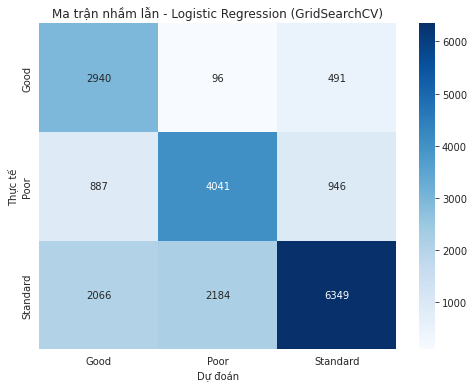

In [39]:
y_val_pred_log = grid_model_log.predict(X_val_scaled)
plot_confusion_matrix(y_val, y_val_pred_log, 'Logistic Regression (GridSearchCV)', class_names)

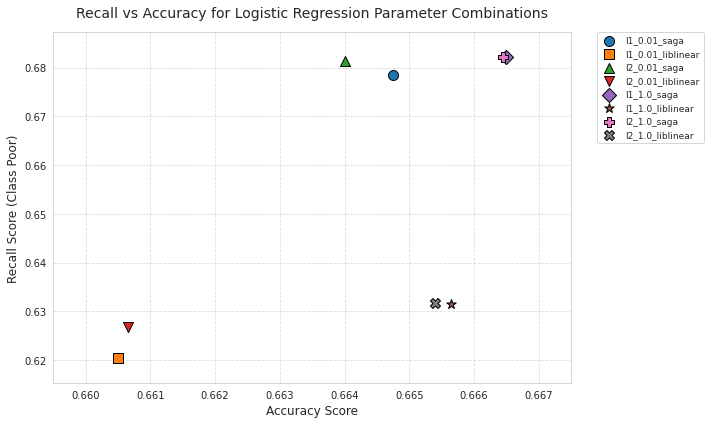

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Extract GridSearchCV results
results = pd.DataFrame(grid_model_log.cv_results_)
recall_scores = results['mean_test_score']  # Recall for class Poor (label 1)
param_columns = ['param_penalty', 'param_C', 'param_solver']
params = results[param_columns]
param_combinations = params.apply(lambda row: f"{row['param_penalty']}_{row['param_C']}_{row['param_solver']}", axis=1)

# Compute accuracy scores for each parameter combination
accuracy_scores = []
for param in results['params']:
    model = LogisticRegression(
        penalty=param['penalty'],
        C=param['C'],
        class_weight=param['class_weight'],
        solver=param['solver'],
        random_state=random_state,
        max_iter=10000
    )
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_scores.append(accuracy)

# Prepare data for plotting
plot_data = pd.DataFrame({
    'accuracy': accuracy_scores,
    'recall': recall_scores,
    'params': param_combinations
})

# Define unique markers and colors for 8 combinations
markers = ['o', 's', '^', 'v', 'D', '*', 'P', 'X']  # 8 distinct markers
colors = [
    '#1f77b4',  # Blue
    '#ff7f0e',  # Orange
    '#2ca02c',  # Green
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#8c564b',  # Brown
    '#e377c2',  # Pink
    '#7f7f7f'   # Gray
]  # 8 distinct colors

# Plotting with matplotlib
plt.figure(figsize=(10, 6))
for idx, row in plot_data.iterrows():
    label = row['params']
    plt.scatter(
        row['accuracy'], row['recall'], s=100, color=colors[idx], marker=markers[idx],
        edgecolors='black', linewidth=1, label=label
    )

# Customize plot
plt.xlabel('Accuracy Score', fontsize=12)
plt.ylabel('Recall Score (Class Poor)', fontsize=12)
plt.title('Recall vs Accuracy for Logistic Regression Parameter Combinations', fontsize=14, pad=15)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(min(accuracy_scores) - 0.001, max(accuracy_scores) + 0.001)  # Adjust x-axis
plt.ylim(min(recall_scores) - 0.005, max(recall_scores) + 0.005)  # Adjust y-axis
plt.legend(loc='best', fontsize=9, bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()

In [41]:
import pandas as pd
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Extract GridSearchCV results
results = pd.DataFrame(grid_model_log.cv_results_)
param_columns = ['param_penalty', 'param_C', 'param_solver']
params = results[param_columns]
param_combinations = params.apply(lambda row: f"{row['param_penalty']}_{row['param_C']}_{row['param_solver']}", axis=1)

# Initialize lists to store metrics and runtimes
metrics = []
runtimes = []
best_params = grid_model_log.best_params_
best_params_str = f"{best_params['penalty']}_{best_params['C']}_{best_params['solver']}"

# Compute metrics and runtime for each parameter combination
for idx, param in enumerate(results['params']):
    start_time = time.time()
    model = LogisticRegression(
        penalty=param['penalty'],
        C=param['C'],
        class_weight=param['class_weight'],
        solver=param['solver'],
        random_state=random_state,
        max_iter=10000
    )
    model.fit(X_train_scaled, y_train)
    end_time = time.time()
    
    # Predict on validation set
    y_pred = model.predict(X_val_scaled)
    
    # Compute metrics for class Poor (label 1)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, labels=[1], average=None)[0]
    recall = recall_score(y_val, y_pred, labels=[1], average=None)[0]
    f1 = f1_score(y_val, y_pred, labels=[1], average=None)[0]
    
    metrics.append([accuracy, precision, recall, f1])
    runtimes.append(end_time - start_time)

# Create DataFrame for the table
table_data = pd.DataFrame({
    'Số thứ tự': range(1, len(param_combinations) + 1),
    'Tên mô hình': param_combinations,
    'Điều kiện dừng': ['max_iter=10000'] * len(param_combinations),
    'Phương pháp tối ưu hóa siêu tham số': ['GridSearchCV'] * len(param_combinations),
    'Siêu tham số': [f"penalty={p['penalty']}, C={p['C']}, solver={p['solver']}, class_weight=balanced" 
                     for p in results['params']],
    'Accuracy': [m[0] for m in metrics],
    'Precision': [m[1] for m in metrics],
    'Recall': [m[2] for m in metrics],
    'F1-Score': [m[3] for m in metrics],
    'Thời gian chạy (giây)': runtimes,
    'Chú giải': ['Best model' if name == best_params_str else '' for name in param_combinations]
})

# Style the table
styled_table = table_data.style.set_properties(**{
    'text-align': 'left',
    'font-size': '12pt',
    'border-color': 'black',
    'border-style': 'solid',
    'border-width': '1px'
}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold'), ('background-color', '#f0f0f0')]},
    {'selector': 'td', 'props': [('padding', '8px')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f9f9f9')]}
]).format({
    'Accuracy': '{:.3f}',
    'Precision': '{:.3f}',
    'Recall': '{:.3f}',
    'F1-Score': '{:.3f}',
    'Thời gian chạy (giây)': '{:.2f}'
}).set_caption('Bảng Mô Tả Chi Tiết Các Mô Hình Logistic Regression')

# Display the table
display(styled_table)

,Số thứ tự,Tên mô hình,Điều kiện dừng,Phương pháp tối ưu hóa siêu tham số,Siêu tham số,Accuracy,Precision,Recall,F1-Score,Thời gian chạy (giây),Chú giải
0,1,l1_0.01_saga,max_iter=10000,GridSearchCV,"penalty=l1, C=0.01, solver=saga, class_weight=balanced",0.665,0.642,0.685,0.663,4.19,
1,2,l1_0.01_liblinear,max_iter=10000,GridSearchCV,"penalty=l1, C=0.01, solver=liblinear, class_weight=balanced",0.660,0.650,0.631,0.641,4.49,
2,3,l2_0.01_saga,max_iter=10000,GridSearchCV,"penalty=l2, C=0.01, solver=saga, class_weight=balanced",0.664,0.640,0.686,0.662,3.14,
3,4,l2_0.01_liblinear,max_iter=10000,GridSearchCV,"penalty=l2, C=0.01, solver=liblinear, class_weight=balanced",0.661,0.649,0.634,0.642,2.74,
4,5,l1_1.0_saga,max_iter=10000,GridSearchCV,"penalty=l1, C=1.0, solver=saga, class_weight=balanced",0.666,0.639,0.688,0.663,18.87,Best model
5,6,l1_1.0_liblinear,max_iter=10000,GridSearchCV,"penalty=l1, C=1.0, solver=liblinear, class_weight=balanced",0.666,0.655,0.642,0.648,94.69,
6,7,l2_1.0_saga,max_iter=10000,GridSearchCV,"penalty=l2, C=1.0, solver=saga, class_weight=balanced",0.666,0.639,0.688,0.663,13.11,
7,8,l2_1.0_liblinear,max_iter=10000,GridSearchCV,"penalty=l2, C=1.0, solver=liblinear, class_weight=balanced",0.665,0.655,0.641,0.648,4.90,


# 02. Implement Random Forest Classifier Model

## OrdinalEncoder

- Ordinal data represents categories with a specific order or hierarchy. Ordinal encoding is suitable for ordinal data.

In [42]:
import sklearn; print(sklearn.__version__)

1.0.2


In [43]:
from sklearn.preprocessing import OrdinalEncoder

cat = X_train_dummy.select_dtypes(include="object").columns.to_list()    
print('OrdinalEncoder:', cat) 
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train_cat = pd.DataFrame(
    enc.fit_transform(X_train_dummy[cat]), index = X_train_dummy.index, 
    columns = enc.feature_names_in_
)    
X_val_cat  = pd.DataFrame(
    enc.transform(X_val_dummy[cat]), index = X_val_dummy.index, 
    columns = enc.feature_names_in_
)    
X_train_enc = X_train_cat.join(X_train_dummy.select_dtypes("number"))
X_val_enc   = X_val_cat.join(X_val_dummy.select_dtypes("number"))

X_train_enc.shape, X_val_enc.shape

OrdinalEncoder: ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']


((80000, 31), (20000, 31))

In [44]:
X_train_enc.columns

Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'ToL_No Data', 'ToL_auto loan',
       'ToL_credit-builder loan', 'ToL_debt consolidation loan',
       'ToL_home equity loan', 'ToL_mortgage loan', 'ToL_not specified',
       'ToL_payday loan', 'ToL_personal loan', 'ToL_student loan'],
      dtype='object')

## RandomForestClassifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(
    class_weight = 'balanced',
    random_state=random_state
)

In [46]:
%%time
rfc.fit(X_train_enc, y_train)

CPU times: user 26 s, sys: 167 ms, total: 26.2 s
Wall time: 26.2 s


RandomForestClassifier(class_weight='balanced', random_state=42)

In [47]:
print("RF MODEL")
eval(rfc, X_train_enc, X_val_enc)

RF MODEL
TEST
[[2703   13  811]
 [  16 4949  909]
 [ 714 1194 8691]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      3527
           1       0.80      0.84      0.82      5874
           2       0.83      0.82      0.83     10599

    accuracy                           0.82     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.82      0.82      0.82     20000

-------------------------------------------------------
TRAIN
[[14301     0     0]
 [    0 23124     0]
 [    1     0 42574]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14301
           1       1.00      1.00      1.00     23124
           2       1.00      1.00      1.00     42575

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000



## With Best Parameters (GridsearchCV)

In [48]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(
    class_weight = 'balanced',
    random_state=random_state
)
param_grid = {
    'class_weight': ['balanced'], # [None, 'balanced', 'balanced_subsample']
    'n_estimators': np.linspace(100, 200, 2, dtype=int),
    'criterion'   : ["gini", "entropy"],
    'max_depth'   : np.arange(2, 3, 1), 
    'min_impurity_decrease': [0],
    'oob_score'   : [True],  
#     'max_features': [None],
}
grid_model_rfc = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring = scoring['recall'],      
    error_score='raise',  
    n_jobs = -1,
#     refit=True,
    cv=5,
)

In [49]:
%%time
grid_model_rfc.fit(X_train_enc, y_train)

CPU times: user 10.6 s, sys: 186 ms, total: 10.8 s
Wall time: 1min 2s


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([2]), 'min_impurity_decrease': [0],
                         'n_estimators': array([100, 200]),
                         'oob_score': [True]},
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [50]:
# Get the best hyperparameters
best_paramsl_rfc = grid_model_rfc.best_params_

best_paramsl_rfc, grid_model_rfc.best_score_

({'class_weight': 'balanced',
  'criterion': 'entropy',
  'max_depth': 2,
  'min_impurity_decrease': 0,
  'n_estimators': 200,
  'oob_score': True},
 0.7551030487234639)

In [51]:
print("GRID RF MODEL BALANCED")
eval(grid_model_rfc, X_train_enc, X_val_enc)

GRID RF MODEL BALANCED
TEST
[[3007   98  422]
 [1019 4448  407]
 [3073 2628 4898]]
              precision    recall  f1-score   support

           0       0.42      0.85      0.57      3527
           1       0.62      0.76      0.68      5874
           2       0.86      0.46      0.60     10599

    accuracy                           0.62     20000
   macro avg       0.63      0.69      0.62     20000
weighted avg       0.71      0.62      0.62     20000

-------------------------------------------------------
TRAIN
[[12256   407  1638]
 [ 4166 17461  1497]
 [12313 10310 19952]]
              precision    recall  f1-score   support

           0       0.43      0.86      0.57     14301
           1       0.62      0.76      0.68     23124
           2       0.86      0.47      0.61     42575

    accuracy                           0.62     80000
   macro avg       0.64      0.69      0.62     80000
weighted avg       0.72      0.62      0.62     80000



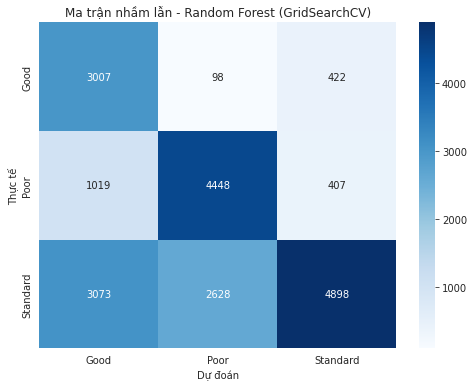

In [52]:
y_val_pred_rfc = grid_model_rfc.predict(X_val_enc)
plot_confusion_matrix(y_val, y_val_pred_rfc, 'Random Forest (GridSearchCV)', class_names)

In [53]:
from sklearn.model_selection import GridSearchCV
import numpy as np

model = RandomForestClassifier(
    class_weight='balanced',
    random_state=42
)
param_grid = {
    'class_weight': ['balanced'],           # 1 giá trị
    'n_estimators': [50, 100, 150, 200],   # 4 giá trị
    'criterion': ['gini'],                 # 1 giá trị
    'max_depth': [20, None],               # 2 giá trị
    'min_impurity_decrease': [0],          # 1 giá trị
    'oob_score': [False],                  # 1 giá trị
}
grid_model_rfc = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=scoring['recall'],             # Sử dụng recall cho nhãn lớp 1
    error_score='raise',
    n_jobs=-1,                             # Sử dụng tất cả CPU
    cv=5,                                  # 5-fold cross-validation
    refit=True,                            # Huấn luyện lại với tham số tốt nhất
    verbose=1,                             # Hiển thị tiến trình
    return_train_score=True                # Lưu kết quả trên tập huấn luyện
)

# Tổng số tổ hợp: 1 * 4 * 1 * 2 * 1 * 1 = 8 bộ tham số

In [54]:
%%time
grid_model_rfc.fit(X_train_enc, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: user 46.7 s, sys: 239 ms, total: 46.9 s
Wall time: 8min 5s


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced'], 'criterion': ['gini'],
                         'max_depth': [20, None], 'min_impurity_decrease': [0],
                         'n_estimators': [50, 100, 150, 200],
                         'oob_score': [False]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]),
             verbose=1)

In [55]:
# Get the best hyperparameters
best_params_rfc = grid_model_rfc.best_params_
best_score_rfc = grid_model_rfc.best_score_

print("Best parameters for Random Forest:", best_params_rfc)
print("Best cross-validation recall (class 1 - Poor):", best_score_rfc)

# Lấy kết quả của tất cả các bộ tham số
results = pd.DataFrame(grid_model_rfc.cv_results_)
param_combinations = results['params']
mean_test_scores = results['mean_test_score']
std_test_scores = results['std_test_score']

print("\nRecall (class 1 - Poor) for all parameter combinations:")
for i, (params, mean_score, std_score) in enumerate(zip(param_combinations, mean_test_scores, std_test_scores)):
    print(f"Combination {i+1}: {params}")
    print(f"Mean CV Recall: {mean_score:.3f}, Std: {std_score:.3f}\n")

Best parameters for Random Forest: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20, 'min_impurity_decrease': 0, 'n_estimators': 200, 'oob_score': False}
Best cross-validation recall (class 1 - Poor): 0.836317516132049

Recall (class 1 - Poor) for all parameter combinations:
Combination 1: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20, 'min_impurity_decrease': 0, 'n_estimators': 50, 'oob_score': False}
Mean CV Recall: 0.830, Std: 0.007

Combination 2: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20, 'min_impurity_decrease': 0, 'n_estimators': 100, 'oob_score': False}
Mean CV Recall: 0.835, Std: 0.004

Combination 3: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20, 'min_impurity_decrease': 0, 'n_estimators': 150, 'oob_score': False}
Mean CV Recall: 0.836, Std: 0.005

Combination 4: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20, 'min_impurity_decrease': 0, 'n_estimators': 200, 'oob_score': False}

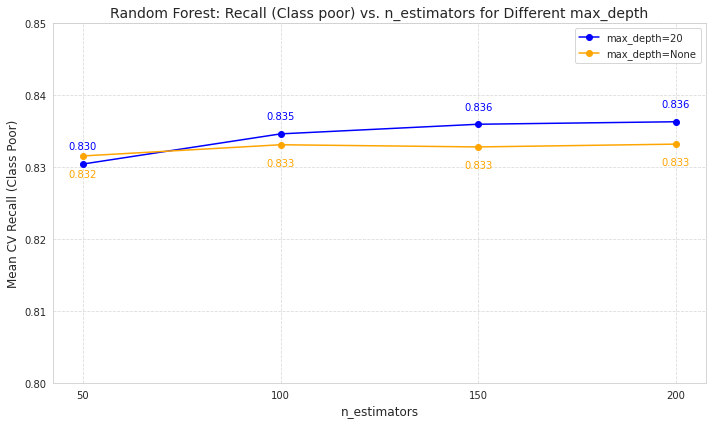

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Lấy kết quả từ GridSearchCV
results = pd.DataFrame(grid_model_rfc.cv_results_)
param_combinations = results['params']
mean_test_scores = results['mean_test_score']

# Tạo dữ liệu cho biểu đồ
n_estimators = [50, 100, 150, 200]
recalls_max_depth_20 = []
recalls_max_depth_none = []

# Phân loại recall theo max_depth
for params, score in zip(param_combinations, mean_test_scores):
    if params['max_depth'] == 20:
        recalls_max_depth_20.append(score)
    else:  # max_depth=None
        recalls_max_depth_none.append(score)

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, recalls_max_depth_20, marker='o', label='max_depth=20', color='blue')
plt.plot(n_estimators, recalls_max_depth_none, marker='o', label='max_depth=None', color='orange')
plt.title('Random Forest: Recall (Class poor) vs. n_estimators for Different max_depth', fontsize=14)
plt.xlabel('n_estimators', fontsize=12)
plt.ylabel('Mean CV Recall (Class Poor)', fontsize=12)
plt.ylim(0.8, 0.85)  # Giới hạn trục y từ 0.6 đến 1.0
plt.yticks(np.arange(0.8, 0.86, 0.01))  # Chia nhỏ trục y, bước 0.05
plt.xticks(n_estimators)  # Đặt các giá trị n_estimators trên trục x
plt.legend()  # Hiển thị chú thích
plt.grid(True, linestyle='--', alpha=0.7)

# Thêm giá trị recall trên các điểm
for i, rec in enumerate(recalls_max_depth_20):
    plt.text(n_estimators[i], rec + 0.002, f'{rec:.3f}', ha='center', fontsize=10, color='blue')
for i, rec in enumerate(recalls_max_depth_none):
    plt.text(n_estimators[i], rec - 0.003, f'{rec:.3f}', ha='center', fontsize=10, color='orange')

plt.tight_layout()

# Lưu biểu đồ
plt.savefig('rf_grid_search_recall_poor_line_plot.png')
plt.show()

In [57]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Lấy kết quả từ GridSearchCV
results = pd.DataFrame(grid_model_rfc.cv_results_)
param_combinations = results['params']
mean_test_scores = results['mean_test_score']
mean_fit_times = results['mean_fit_time']

# Khởi tạo bảng kết quả
table_data = {
    'Số thứ tự': [],
    'Tên mô hình': [],
    'Điều kiện dừng': [],
    'Phương pháp tối ưu hóa siêu tham số': [],
    'Siêu tham số': [],
    'Accuracy': [],
    'Precision (Poor)': [],
    'Recall (Poor)': [],
    'F1-score (Poor)': [],
    'Thời gian chạy (s)': [],
    'Chú giải': []
}

# Đánh giá từng bộ tham số
for i, params in enumerate(param_combinations):
    # Tạo mô hình với bộ tham số
    model = RandomForestClassifier(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        criterion=params['criterion'],
        class_weight=params['class_weight'],
        min_impurity_decrease=params['min_impurity_decrease'],
        oob_score=params['oob_score'],
        random_state=42
    )
    
    # Đo thời gian huấn luyện
    start_time = time.time()
    model.fit(X_train_enc, y_train)
    fit_time = time.time() - start_time
    
    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_val_enc)
    
    # Tính các chỉ số
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred, average=None, labels=[1])[0]  # Lớp 1 (Poor)
    rec = recall_score(y_val, y_pred, average=None, labels=[1])[0]      # Lớp 1 (Poor)
    f1 = f1_score(y_val, y_pred, average=None, labels=[1])[0]            # Lớp 1 (Poor)
    
    # Xác định điều kiện dừng
    stop_condition = f"max_depth={params['max_depth']}, min_impurity_decrease={params['min_impurity_decrease']}"
    
    # Tạo chú giải
    note = f"Số cây: {params['n_estimators']}, Độ sâu: {'Không giới hạn' if params['max_depth'] is None else params['max_depth']}"
    
    # Thêm vào bảng
    table_data['Số thứ tự'].append(i + 1)
    table_data['Tên mô hình'].append(f"RF_{i+1}")
    table_data['Điều kiện dừng'].append(stop_condition)
    table_data['Phương pháp tối ưu hóa siêu tham số'].append("GridSearchCV")
    table_data['Siêu tham số'].append(str(params))
    table_data['Accuracy'].append(acc)
    table_data['Precision (Poor)'].append(prec)
    table_data['Recall (Poor)'].append(rec)
    table_data['F1-score (Poor)'].append(f1)
    table_data['Thời gian chạy (s)'].append(fit_time)
    table_data['Chú giải'].append(note)

# Tạo DataFrame
table_df = pd.DataFrame(table_data)

# Định dạng số thập phân
table_df['Accuracy'] = table_df['Accuracy'].round(3)
table_df['Precision (Poor)'] = table_df['Precision (Poor)'].round(3)
table_df['Recall (Poor)'] = table_df['Recall (Poor)'].round(3)
table_df['F1-score (Poor)'] = table_df['F1-score (Poor)'].round(3)
table_df['Thời gian chạy (s)'] = table_df['Thời gian chạy (s)'].round(2)

# Hiển thị bảng
print("\nBảng mô tả chi tiết các mô hình Random Forest:")
display(table_df)

# Lưu bảng thành CSV
table_df.to_csv('rf_model_comparison_table.csv', index=False)


Bảng mô tả chi tiết các mô hình Random Forest:


,Số thứ tự,Tên mô hình,Điều kiện dừng,Phương pháp tối ưu hóa siêu tham số,Siêu tham số,Accuracy,Precision (Poor),Recall (Poor),F1-score (Poor),Thời gian chạy (s),Chú giải
0,1,RF_1,"max_depth=20, min_impurity_decrease=0",GridSearchCV,"{'class_weight': 'balanced', 'criterion': 'gin...",0.788,0.792,0.836,0.813,11.590,"Số cây: 50, Độ sâu: 20"
1,2,RF_2,"max_depth=20, min_impurity_decrease=0",GridSearchCV,"{'class_weight': 'balanced', 'criterion': 'gin...",0.790,0.793,0.839,0.815,23.290,"Số cây: 100, Độ sâu: 20"
2,3,RF_3,"max_depth=20, min_impurity_decrease=0",GridSearchCV,"{'class_weight': 'balanced', 'criterion': 'gin...",0.792,0.792,0.843,0.817,34.890,"Số cây: 150, Độ sâu: 20"
3,4,RF_4,"max_depth=20, min_impurity_decrease=0",GridSearchCV,"{'class_weight': 'balanced', 'criterion': 'gin...",0.792,0.792,0.843,0.816,47.060,"Số cây: 200, Độ sâu: 20"
4,5,RF_5,"max_depth=None, min_impurity_decrease=0",GridSearchCV,"{'class_weight': 'balanced', 'criterion': 'gin...",0.816,0.804,0.844,0.823,13.510,"Số cây: 50, Độ sâu: Không giới hạn"
5,6,RF_6,"max_depth=None, min_impurity_decrease=0",GridSearchCV,"{'class_weight': 'balanced', 'criterion': 'gin...",0.817,0.804,0.843,0.823,26.950,"Số cây: 100, Độ sâu: Không giới hạn"
6,7,RF_7,"max_depth=None, min_impurity_decrease=0",GridSearchCV,"{'class_weight': 'balanced', 'criterion': 'gin...",0.820,0.806,0.847,0.826,40.270,"Số cây: 150, Độ sâu: Không giới hạn"
7,8,RF_8,"max_depth=None, min_impurity_decrease=0",GridSearchCV,"{'class_weight': 'balanced', 'criterion': 'gin...",0.820,0.806,0.845,0.825,54.070,"Số cây: 200, Độ sâu: Không giới hạn"


# 03. Implement XGBoost Classifier Model (Xgboost with Scikit-learn API)

In [58]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    random_state=random_state,
)

In [59]:
%%time
xgb.fit(X_train_enc, y_train, 
    sample_weight=sample_weight
)
# weight parameter in XGBoost is per instance not per class.

CPU times: user 1min 50s, sys: 227 ms, total: 1min 50s
Wall time: 28.6 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, ...)

In [60]:
print("XGB MODEL")
eval(xgb, X_train_enc, X_val_enc)

XGB MODEL
TEST
[[3064   37  426]
 [ 367 4880  627]
 [1655 1724 7220]]
              precision    recall  f1-score   support

           0       0.60      0.87      0.71      3527
           1       0.73      0.83      0.78      5874
           2       0.87      0.68      0.77     10599

    accuracy                           0.76     20000
   macro avg       0.74      0.79      0.75     20000
weighted avg       0.78      0.76      0.76     20000

-------------------------------------------------------
TRAIN
[[13192    77  1032]
 [  995 20368  1761]
 [ 6094  6183 30298]]
              precision    recall  f1-score   support

           0       0.65      0.92      0.76     14301
           1       0.76      0.88      0.82     23124
           2       0.92      0.71      0.80     42575

    accuracy                           0.80     80000
   macro avg       0.78      0.84      0.79     80000
weighted avg       0.82      0.80      0.80     80000



## With Best Parameters (GridsearchCV)

In [61]:
from sklearn.model_selection import GridSearchCV

model = XGBClassifier(
    random_state=random_state
)
param_grid = {
    'n_estimators' : [100],
    'learning_rate': np.linspace(0.01, 0.3, 2).round(3),
    'max_depth'    : [5, 6],   
#     'reg_alpha'    : [0, 0.5, 1],  
#     'reg_lambda'   : [0, 0.5, 1], 
}
grid_model_xgb = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring = scoring['recall'], # 'neg_log_loss'      
    error_score='raise',     
    n_jobs = -1,
#     refit=True,
    cv=5,
)

In [62]:
%%time
grid_model_xgb.fit(X_train_enc, y_train, 
    sample_weight=sample_weight
)

CPU times: user 1min 46s, sys: 460 ms, total: 1min 46s
Wall time: 7min 29s


GridSearchCV(cv=5, error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n

In [63]:
# Get the best hyperparameters
best_params_xgb = grid_model_xgb.best_params_

best_params_xgb, grid_model_xgb.best_score_

({'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 100},
 0.8286197886467782)

In [64]:
print("GRID XGB MODEL BALANCED")
eval(grid_model_xgb, X_train_enc, X_val_enc)

GRID XGB MODEL BALANCED
TEST
[[3064   37  426]
 [ 367 4880  627]
 [1655 1724 7220]]
              precision    recall  f1-score   support

           0       0.60      0.87      0.71      3527
           1       0.73      0.83      0.78      5874
           2       0.87      0.68      0.77     10599

    accuracy                           0.76     20000
   macro avg       0.74      0.79      0.75     20000
weighted avg       0.78      0.76      0.76     20000

-------------------------------------------------------
TRAIN
[[13192    77  1032]
 [  995 20368  1761]
 [ 6094  6183 30298]]
              precision    recall  f1-score   support

           0       0.65      0.92      0.76     14301
           1       0.76      0.88      0.82     23124
           2       0.92      0.71      0.80     42575

    accuracy                           0.80     80000
   macro avg       0.78      0.84      0.79     80000
weighted avg       0.82      0.80      0.80     80000



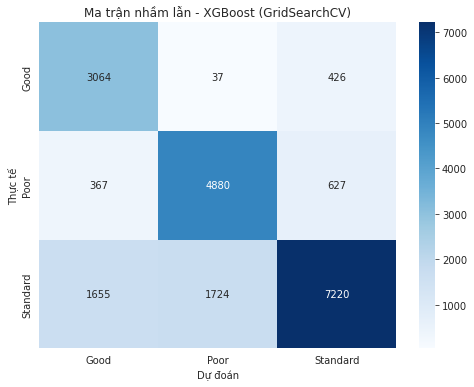

In [65]:
y_val_pred_xgb = grid_model_xgb.predict(X_val_enc)
plot_confusion_matrix(y_val, y_val_pred_xgb, 'XGBoost (GridSearchCV)', class_names)

In [66]:
from sklearn.model_selection import GridSearchCV

model = XGBClassifier(
    random_state=random_state
)
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # 4 values, including default (100)
    'max_depth': [3, 6],                  # 2 values, including default (6)
    'learning_rate': [0.3]                # Fixed to default-like value
}
grid_model_xgb = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=scoring['recall'],      
    error_score='raise',     
    n_jobs=-1,
    cv=5,
)

In [67]:
%%time
grid_model_xgb.fit(X_train_enc, y_train, 
    sample_weight=sample_weight
)

CPU times: user 3min 38s, sys: 498 ms, total: 3min 38s
Wall time: 14min 21s


GridSearchCV(cv=5, error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n

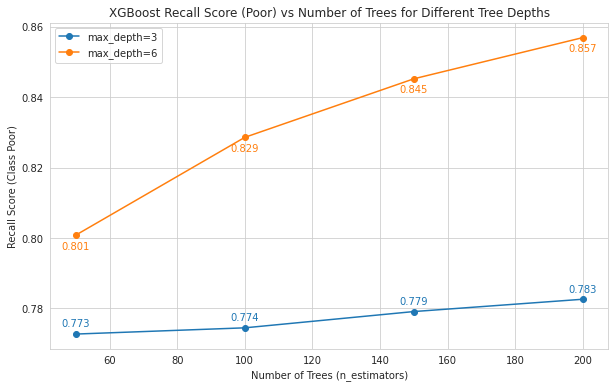

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

# Get results from GridSearchCV
results = pd.DataFrame(grid_model_xgb.cv_results_)
recall_scores = results['mean_test_score']
n_estimators = results['param_n_estimators'].astype(int)
max_depth = results['param_max_depth'].astype(int)

# Prepare data for plotting
plot_data = pd.DataFrame({
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'recall': recall_scores
})

# Plotting with matplotlib
plt.figure(figsize=(10, 6))
for depth in plot_data['max_depth'].unique():
    subset = plot_data[plot_data['max_depth'] == depth]
    color = '#1f77b4' if depth == 3 else '#ff7f0e'
    label = f'max_depth={depth}'
    plt.plot(subset['n_estimators'], subset['recall'], marker='o', color=color, label=label)
    
    # Add recall values as text labels
    for i, rec in enumerate(subset['recall']):
        offset = 0.002 if depth == 3 else -0.004  # Above for max_depth=3, below for max_depth=6
        plt.text(subset['n_estimators'].iloc[i], rec + offset, f'{rec:.3f}', 
                 ha='center', fontsize=10, color=color)

plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Recall Score (Class Poor)')
plt.title('XGBoost Recall Score (Poor) vs Number of Trees for Different Tree Depths')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
# Create table for model details
table_data = []
for i, params in enumerate(results['params']):
    # Train model with current parameters and measure time
    start_time = time.time()
    model = XGBClassifier(
        random_state=42,
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        learning_rate=params['learning_rate']
    )
    model.fit(X_train_enc, y_train, sample_weight=sample_weight)
    y_val_pred = model.predict(X_val_enc)
    end_time = time.time()
    runtime = round(end_time - start_time, 3)
    
    # Calculate metrics for class Poor (label 1)
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred, average=None, labels=[1])[0]
    recall = recall_score(y_val, y_val_pred, average=None, labels=[1])[0]
    f1 = f1_score(y_val, y_val_pred, average=None, labels=[1])[0]
    
    # Determine if this is the default parameter set
    is_default = (params['n_estimators'] == 100 and 
                  params['max_depth'] == 6 and 
                  params['learning_rate'] == 0.3)
    note = "Default parameters" if is_default else ""
    if is_default and params == grid_model_xgb.best_params_:
        note = "Default and best parameters"
    elif params == grid_model_xgb.best_params_:
        note = "Best parameters"
    
    # Append to table
    table_data.append({
        'Số thứ tự': i + 1,
        'Tên mô hình': f'XGBoost_{i + 1}',
        'Điều kiện dừng': f"{params['n_estimators']} trees",
        'Phương pháp tối ưu hóa siêu tham số': 'GridSearchCV (5-fold CV)',
        'Siêu tham số': f"n_estimators={params['n_estimators']}, max_depth={params['max_depth']}, learning_rate={params['learning_rate']}",
        'Accuracy': round(accuracy, 3),
        'Precision (Poor)': round(precision, 3),
        'Recall (Poor)': round(recall, 3),
        'F1-score (Poor)': round(f1, 3),
        'Thời gian chạy (s)': runtime,
        'Chú giải': note
    })

# Create DataFrame and display
table_df = pd.DataFrame(table_data)
display(table_df)

,Số thứ tự,Tên mô hình,Điều kiện dừng,Phương pháp tối ưu hóa siêu tham số,Siêu tham số,Accuracy,Precision (Poor),Recall (Poor),F1-score (Poor),Thời gian chạy (s),Chú giải
0,1,XGBoost_1,50 trees,GridSearchCV (5-fold CV),"n_estimators=50, max_depth=3, learning_rate=0.3",0.686,0.654,0.769,0.707,6.427,
1,2,XGBoost_2,100 trees,GridSearchCV (5-fold CV),"n_estimators=100, max_depth=3, learning_rate=0.3",0.694,0.669,0.772,0.716,12.759,
2,3,XGBoost_3,150 trees,GridSearchCV (5-fold CV),"n_estimators=150, max_depth=3, learning_rate=0.3",0.703,0.680,0.777,0.725,20.530,
3,4,XGBoost_4,200 trees,GridSearchCV (5-fold CV),"n_estimators=200, max_depth=3, learning_rate=0.3",0.710,0.689,0.782,0.733,26.765,
4,5,XGBoost_5,50 trees,GridSearchCV (5-fold CV),"n_estimators=50, max_depth=6, learning_rate=0.3",0.729,0.710,0.799,0.752,13.644,
5,6,XGBoost_6,100 trees,GridSearchCV (5-fold CV),"n_estimators=100, max_depth=6, learning_rate=0.3",0.758,0.735,0.831,0.780,28.139,Default parameters
6,7,XGBoost_7,150 trees,GridSearchCV (5-fold CV),"n_estimators=150, max_depth=6, learning_rate=0.3",0.778,0.753,0.851,0.799,41.668,
7,8,XGBoost_8,200 trees,GridSearchCV (5-fold CV),"n_estimators=200, max_depth=6, learning_rate=0.3",0.792,0.761,0.864,0.809,56.760,Best parameters


In [70]:
# Cài đặt thư viện nếu chưa có
# !pip install lightgbm

import lightgbm as lgb

# Khởi tạo và huấn luyện mô hình LightGBM cơ bản
# Tương tự XGBoost, LightGBM cũng có thể sử dụng sample_weight
lgbm = lgb.LGBMClassifier(random_state=random_state)
lgbm.fit(X_train_enc, y_train, sample_weight=sample_weight)


LGBMClassifier(random_state=42)

==== Kết quả đánh giá LightGBM ====
Accuracy: 0.7199
Precision: 0.7590
Recall: 0.7199
F1-score: 0.7224

Báo cáo phân loại:
              precision    recall  f1-score   support

        Good       0.55      0.86      0.67      3527
        Poor       0.70      0.80      0.75      5874
    Standard       0.86      0.63      0.73     10599

    accuracy                           0.72     20000
   macro avg       0.70      0.76      0.71     20000
weighted avg       0.76      0.72      0.72     20000



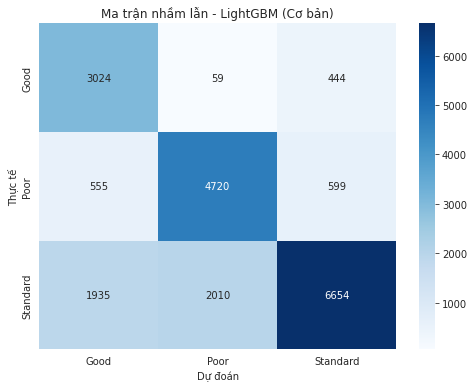

In [71]:
y_val_pred_lgbm = lgbm.predict(X_val_enc)
# Đánh giá mô hình
acc = accuracy_score(y_val, y_val_pred_lgbm)
pre = precision_score(y_val, y_val_pred_lgbm, average='weighted')   # hoặc 'macro', 'micro' tùy bài toán
rec = recall_score(y_val, y_val_pred_lgbm, average='weighted')
f1 = f1_score(y_val, y_val_pred_lgbm, average='weighted')

# In ra kết quả
print("==== Kết quả đánh giá LightGBM ====")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {pre:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")

# Báo cáo chi tiết theo từng lớp (nếu cần)
print("\nBáo cáo phân loại:")
print(classification_report(y_val, y_val_pred_lgbm, target_names=class_names))
plot_confusion_matrix(y_val, y_val_pred_lgbm, 'LightGBM (Cơ bản)', class_names)

**> Cải tiến**# 

Fitting 3 folds for each of 20 candidates, totalling 60 fits
✅ Tham số tốt nhất tìm được:
{'colsample_bytree': 0.9779976597381381, 'learning_rate': 0.08272719958564209, 'max_depth': 9, 'n_estimators': 299, 'num_leaves': 28, 'subsample': 0.7587948587257435}

🎯 Kết quả đánh giá trên tập validation:
Accuracy : 0.7512
Precision: 0.7808
Recall   : 0.7512
F1-score : 0.7531

📋 Báo cáo phân loại:
              precision    recall  f1-score   support

        Good       0.59      0.87      0.70      3527
        Poor       0.73      0.83      0.77      5874
    Standard       0.87      0.67      0.76     10599

    accuracy                           0.75     20000
   macro avg       0.73      0.79      0.75     20000
weighted avg       0.78      0.75      0.75     20000



/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


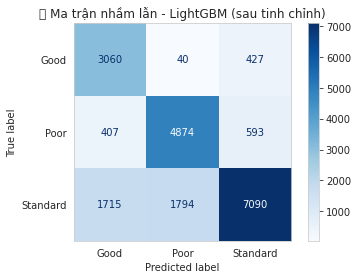

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt
import lightgbm as lgb
# 1. Định nghĩa không gian tham số
param_dist = {
    'n_estimators': randint(100, 300),
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': randint(3, 10),
    'num_leaves': randint(15, 40),
    'subsample': uniform(0.7, 0.3),         # [0.7, 1.0]
    'colsample_bytree': uniform(0.7, 0.3)   # [0.7, 1.0]
}

# 2. RandomizedSearchCV để tìm tham số tốt nhất
lgbm = lgb.LGBMClassifier(random_state=42)

rs = RandomizedSearchCV(
    lgbm,
    param_distributions=param_dist,
    n_iter=20,              # số lần thử
    scoring='f1_weighted',  # bạn có thể đổi sang 'accuracy', 'roc_auc_ovr', etc.
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# 3. Huấn luyện trên tập train
rs.fit(X_train_enc, y_train, sample_weight=sample_weight)

# 4. In tham số tốt nhất
print("✅ Tham số tốt nhất tìm được:")
print(rs.best_params_)

# 5. Dự đoán trên tập validation
best_model = rs.best_estimator_
y_val_pred = best_model.predict(X_val_enc)

# 6. Tính toán các chỉ số
acc = accuracy_score(y_val, y_val_pred)
pre = precision_score(y_val, y_val_pred, average='weighted')
rec = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

print("\n🎯 Kết quả đánh giá trên tập validation:")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {pre:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

# 7. Báo cáo phân loại chi tiết
print("\n📋 Báo cáo phân loại:")
print(classification_report(y_val, y_val_pred, target_names=class_names))

# 8. Vẽ ma trận nhầm lẫn
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues')
plt.title("🧩 Ma trận nhầm lẫn - LightGBM (sau tinh chỉnh)")
plt.show()


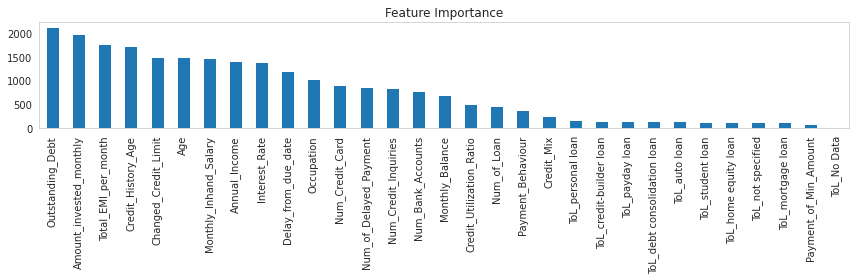


🔍 Loại bỏ 11 đặc trưng ít quan trọng.

✅ Kết quả sau khi loại đặc trưng ít quan trọng:
Accuracy : 0.7477
Precision: 0.7774
Recall   : 0.7477
F1-score : 0.7495


/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


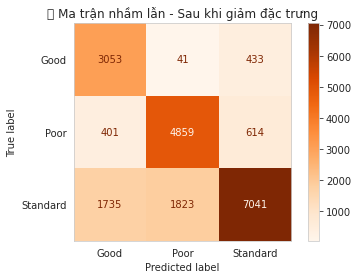

In [73]:
# -----------------------------
# 3. Cải tiến bằng Feature Importance
# -----------------------------

# Lấy danh sách đặc trưng ít quan trọng
feature_importance = pd.Series(best_model.feature_importances_, index=X_train_enc.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12, 4), title='Feature Importance')
plt.tight_layout()
plt.show()

# Loại các đặc trưng có độ quan trọng < 1% tổng trọng số
low_importance = feature_importance[feature_importance < feature_importance.sum() * 0.01].index
print(f"\n🔍 Loại bỏ {len(low_importance)} đặc trưng ít quan trọng.")

# Loại bỏ cột khỏi dữ liệu
X_train_filtered = X_train_enc.drop(columns=low_importance)
X_val_filtered = X_val_enc.drop(columns=low_importance)

# Huấn luyện lại mô hình tốt nhất trên dữ liệu rút gọn
best_model.fit(X_train_filtered, y_train, sample_weight=sample_weight)
y_val_pred_filtered = best_model.predict(X_val_filtered)

# Đánh giá lại
acc = accuracy_score(y_val, y_val_pred_filtered)
pre = precision_score(y_val, y_val_pred_filtered, average='weighted')
rec = recall_score(y_val, y_val_pred_filtered, average='weighted')
f1 = f1_score(y_val, y_val_pred_filtered, average='weighted')

print("\n✅ Kết quả sau khi loại đặc trưng ít quan trọng:")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {pre:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

cm = confusion_matrix(y_val, y_val_pred_filtered)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Oranges')
plt.title("🧩 Ma trận nhầm lẫn - Sau khi giảm đặc trưng")
plt.show()

In [74]:
type(X_train_enc)


pandas.core.frame.DataFrame

**SMOTE**


In [75]:
# Cài đặt thư viện nếu chưa có
# !pip install -U imbalanced-learn

#from imblearn.over_sampling import SMOTE
#import numpy as np

# Hiển thị phân phối lớp trước khi SMOTE
#print("Phân phối lớp ban đầu trong tập huấn luyện:")
#print(np.bincount(y_train))

# Khởi tạo SMOTE
#smote = SMOTE(random_state=random_state)

# Áp dụng SMOTE chỉ trên dữ liệu huấn luyện
# Chúng ta sử dụng X_train_enc và y_train đã được mã hóa ở bước trước
#X_train_smote, y_train_smote = smote.fit_resample(X_train_enc, y_train)

# Hiển thị phân phối lớp sau khi SMOTE
#print("\nPhân phối lớp trong tập huấn luyện sau khi SMOTE:")
#print(np.bincount(y_train_smote))

# Kiểm tra lại kích thước của tập dữ liệu sau khi SMOTE
#print(f"\nKích thước tập huấn luyện trước SMOTE: {X_train_enc.shape}")
#print(f"Kích thước tập huấn luyện sau SMOTE: {X_train_smote.shape}")

# Compare The Models

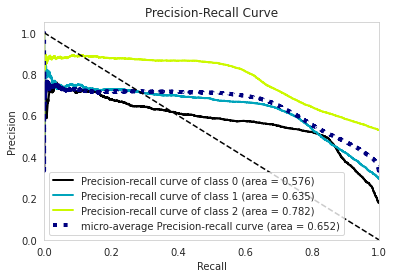

In [76]:
# !pip install scikit-plot -q
import scikitplot as skplt

y_val_proba = grid_model_log.predict_proba(X_val_scaled)
skplt.metrics.plot_precision_recall(y_val, y_val_proba);
# skplt.metrics.plot_roc(y_test, y_prob_test)
plt.plot([0, 1],[1, 0], 'k--')
plt.show()

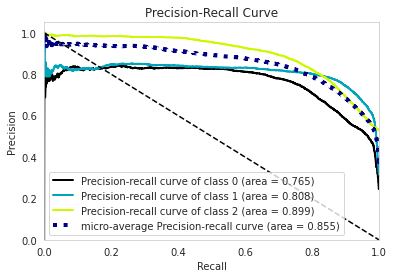

In [77]:
# !pip install scikit-plot -q
import scikitplot as skplt

y_val_proba = grid_model_rfc.predict_proba(X_val_enc)
skplt.metrics.plot_precision_recall(y_val, y_val_proba);
# skplt.metrics.plot_roc(y_test, y_prob_test)
plt.plot([0, 1],[1, 0], 'k--')
plt.show()

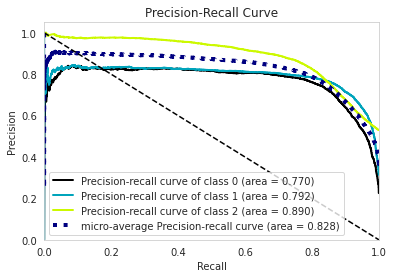

In [78]:
# !pip install scikit-plot -q
import scikitplot as skplt

y_val_proba = grid_model_xgb.predict_proba(X_val_enc)
skplt.metrics.plot_precision_recall(y_val, y_val_proba);
# skplt.metrics.plot_roc(y_test, y_prob_test)
plt.plot([0, 1],[1, 0], 'k--')
plt.show()

In [79]:
# from yellowbrick.classifier import PrecisionRecallCurve

# model      = grid_model_log
# visualizer = PrecisionRecallCurve(model, classes=le.classes_, per_class=True, micro=False)
# visualizer.fit(X_train_scaled, y_train)     # Fit the training data to the visualizer
# visualizer.score(X_val_scaled, y_val)       # Evaluate the model on the test data
# visualizer.show(); 

In [80]:
# from yellowbrick.classifier import precision_recall_curve, PrecisionRecallCurve

# # Create the visualizer, fit, score, and show it, take a long time
# viz = precision_recall_curve(grid_model_log, X_train_scaled, y_train, X_val_scaled, y_val)

# 04. Future Importance XGBoost 

In [81]:
# xgb_model has best scorer default parameters
X_val_enc.columns.shape, xgb.feature_importances_.shape

((31,), (31,))

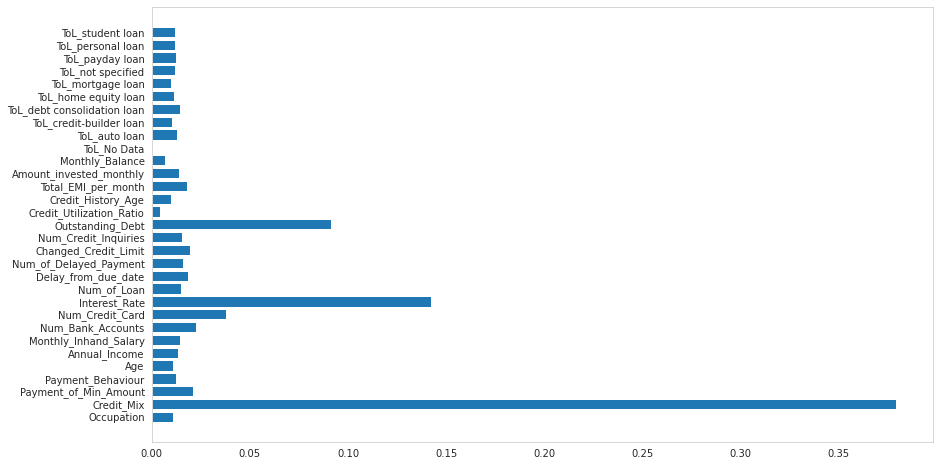

In [82]:
plt.figure(figsize=(14,8))
plt.barh(X_val_enc.columns, xgb.feature_importances_);

## yellowbrick Feature Importances

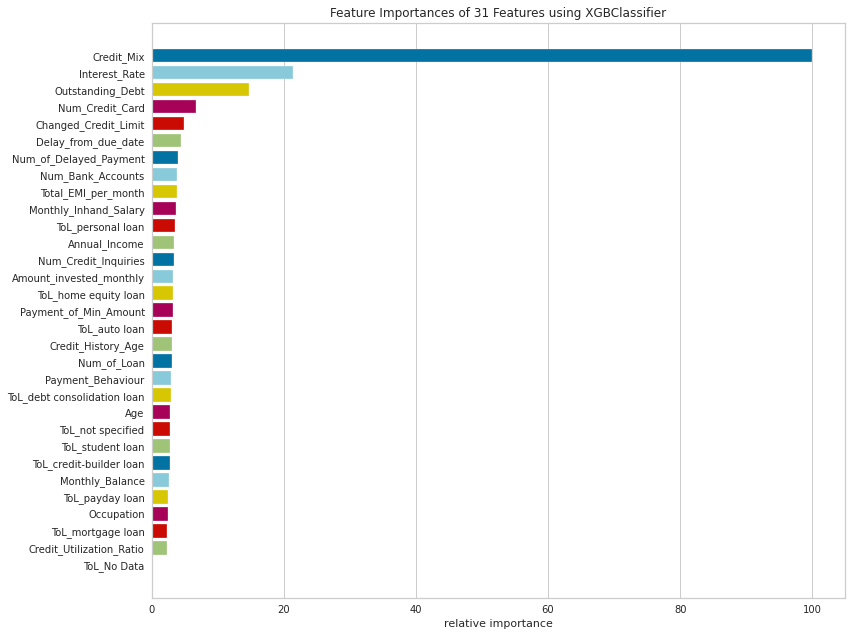

In [83]:
from yellowbrick.model_selection import feature_importances, FeatureImportances

model = XGBClassifier(
    random_state=random_state, 
    **best_params_xgb
)

plt.subplots(figsize=(12, 9))
# Use the quick method and immediately show the figure
feature_importances(model, X_val_enc, y_val);

## Permutation Based Feature Importance (with scikit-learn)

In [84]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(xgb, X_val_enc, y_val)
perm_importance['importances_mean']

array([ 0.00761,  0.16256, -0.00239,  0.00601,  0.01029,  0.0131 ,
        0.02207,  0.01645,  0.01122,  0.08791, -0.00059,  0.04742,
        0.01676,  0.03541,  0.00884,  0.06231,  0.00072,  0.01377,
        0.03692,  0.01844,  0.00791,  0.     ,  0.00147,  0.00075,
        0.00051,  0.00141,  0.00066,  0.00051,  0.00106,  0.00115,
        0.00151])

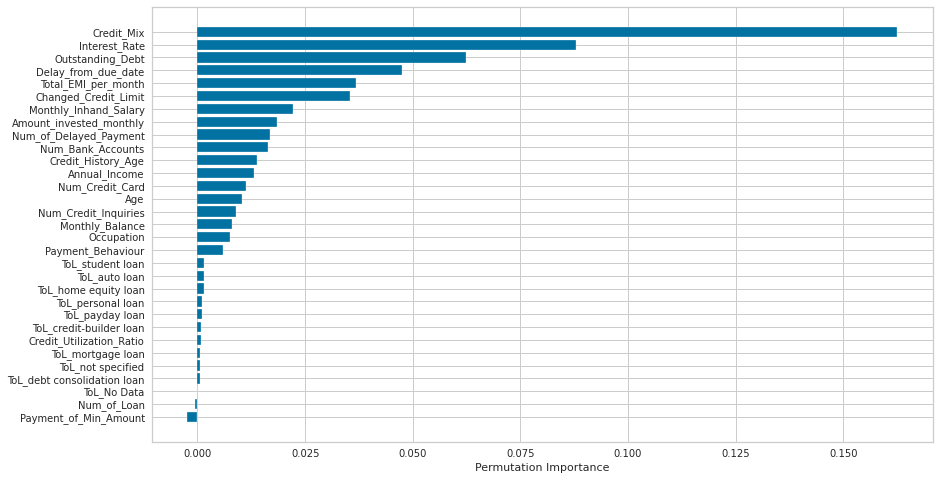

In [85]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(14,8))
plt.barh(X_val_enc.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance");

# 05. Final Model

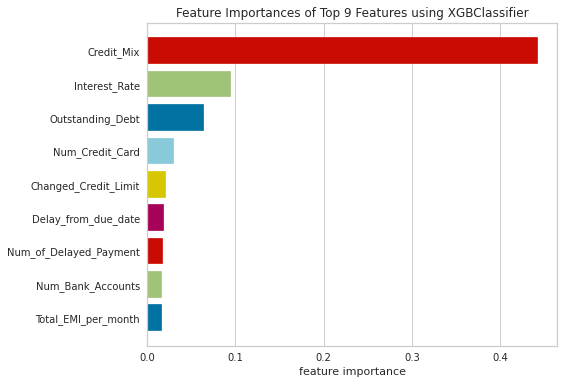

['Total_EMI_per_month' 'Num_Bank_Accounts' 'Num_of_Delayed_Payment'
 'Delay_from_due_date' 'Changed_Credit_Limit' 'Num_Credit_Card'
 'Outstanding_Debt' 'Interest_Rate' 'Credit_Mix']


In [86]:
model = XGBClassifier(
    random_state=random_state, 
    **best_params_xgb
)
# seect top 8 features
viz = feature_importances(model, X_val_enc, y_val, relative=False, topn=9)

# get top 8 features
print(viz.features_)

In [87]:
# we selected 9 features for final model
df_final = df_train[viz.features_.tolist() + ['Credit_Score']]
df_final

,Total_EMI_per_month,Num_Bank_Accounts,Num_of_Delayed_Payment,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Card,Outstanding_Debt,Interest_Rate,Credit_Mix,Credit_Score
0,49.575,3.000,7.000,3.000,11.270,4.000,809.980,3.000,Good,Good
1,49.575,3.000,4.000,3.000,11.270,4.000,809.980,3.000,Good,Good
2,49.575,3.000,7.000,3.000,11.270,4.000,809.980,3.000,Good,Good
3,49.575,3.000,4.000,5.000,6.270,4.000,809.980,3.000,Good,Good
4,49.575,3.000,4.000,6.000,11.270,4.000,809.980,3.000,Good,Good
...,...,...,...,...,...,...,...,...,...,...
99995,35.104,4.000,7.000,23.000,11.500,6.000,502.380,7.000,Good,Poor
99996,35.104,4.000,7.000,18.000,11.500,6.000,502.380,7.000,Good,Poor
99997,35.104,4.000,6.000,27.000,11.500,6.000,502.380,7.000,Good,Poor
99998,35.104,4.000,6.000,20.000,11.500,6.000,502.380,7.000,Good,Standard


In [88]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Total_EMI_per_month     100000 non-null  float64
 1   Num_Bank_Accounts       100000 non-null  float64
 2   Num_of_Delayed_Payment  100000 non-null  float64
 3   Delay_from_due_date     100000 non-null  float64
 4   Changed_Credit_Limit    100000 non-null  float64
 5   Num_Credit_Card         100000 non-null  float64
 6   Outstanding_Debt        100000 non-null  float64
 7   Interest_Rate           100000 non-null  float64
 8   Credit_Mix              100000 non-null  object 
 9   Credit_Score            100000 non-null  object 
dtypes: float64(8), object(2)
memory usage: 7.6+ MB


In [89]:
X = df_final.drop(columns='Credit_Score')
y = df_final['Credit_Score']

In [90]:
cat = X.select_dtypes(include="object").columns.to_list()     
print('OrdinalEncoder:', cat)  
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_enc      = X.copy()
X_enc[cat] = enc.fit_transform(X_enc[cat])

X_enc.shape

OrdinalEncoder: ['Credit_Mix']


(100000, 9)

In [91]:
le = LabelEncoder()
y  = le.fit_transform(y)

In [92]:
sample_weight = class_weight.compute_sample_weight(class_weight='balanced', y=y)
sample_weight

array([1.86971805, 1.86971805, 1.86971805, ..., 1.14950456, 0.62687278,
       1.14950456])

### ({'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 100},

In [93]:
final_model = XGBClassifier(
    random_state=random_state, 
    **best_params_xgb
)

In [94]:
%%time
final_model.fit(X_enc, y, 
    sample_weight=sample_weight
)

CPU times: user 43.9 s, sys: 118 ms, total: 44 s
Wall time: 11.1 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, ...)

              precision    recall  f1-score   support

           0       0.59      0.88      0.70     17828
           1       0.74      0.84      0.79     28998
           2       0.89      0.68      0.77     53174

    accuracy                           0.76    100000
   macro avg       0.74      0.80      0.75    100000
weighted avg       0.79      0.76      0.76    100000



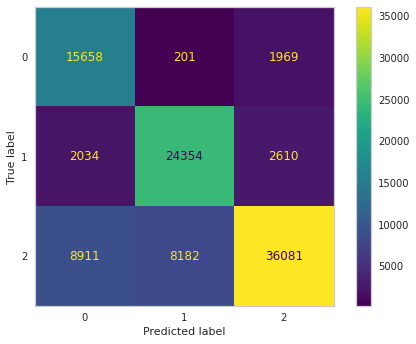

In [95]:
sns.set_style("whitegrid", {'axes.grid' : False})
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = final_model.predict(X_enc)

print(classification_report(y, y_pred))
ConfusionMatrixDisplay.from_estimator(final_model, X_enc, y);

In [96]:
np.bincount(y_pred)

array([26603, 32737, 40660])

In [97]:
X.head()

,Total_EMI_per_month,Num_Bank_Accounts,Num_of_Delayed_Payment,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Card,Outstanding_Debt,Interest_Rate,Credit_Mix
0,49.575,3.000,7.000,3.000,11.270,4.000,809.980,3.000,Good
1,49.575,3.000,4.000,3.000,11.270,4.000,809.980,3.000,Good
2,49.575,3.000,7.000,3.000,11.270,4.000,809.980,3.000,Good
3,49.575,3.000,4.000,5.000,6.270,4.000,809.980,3.000,Good
4,49.575,3.000,4.000,6.000,11.270,4.000,809.980,3.000,Good


In [98]:
X.describe()

,Total_EMI_per_month,Num_Bank_Accounts,Num_of_Delayed_Payment,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Card,Outstanding_Debt,Interest_Rate
count,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000
mean,107.699,5.369,13.313,21.081,10.470,5.534,1426.220,14.532
std,132.267,2.593,6.237,14.805,6.609,2.067,1155.129,8.741
min,0.000,0.000,0.000,0.000,0.500,0.000,0.230,1.000
25%,29.269,3.000,9.000,10.000,5.380,4.000,566.072,7.000
50%,66.462,5.000,14.000,18.000,9.400,5.000,1166.155,13.000
75%,147.393,7.000,18.000,28.000,14.850,7.000,1945.963,20.000
max,1779.103,11.000,25.000,62.000,29.980,11.000,4998.070,34.000


In [99]:
X.describe(include='O')

,Credit_Mix
count,100000
unique,3
top,Standard
freq,45848


In [100]:
mean_human = pd.concat([X.select_dtypes('number').mean().astype(int).to_frame().T, X.select_dtypes('object').mode()], axis=1)
mean_human.to_dict()

{'Total_EMI_per_month': {0: 107},
 'Num_Bank_Accounts': {0: 5},
 'Num_of_Delayed_Payment': {0: 13},
 'Delay_from_due_date': {0: 21},
 'Changed_Credit_Limit': {0: 10},
 'Num_Credit_Card': {0: 5},
 'Outstanding_Debt': {0: 1426},
 'Interest_Rate': {0: 14},
 'Credit_Mix': {0: 'Standard'}}

In [101]:
mean_human[cat] = enc.transform(mean_human[cat])
mean_human

,Total_EMI_per_month,Num_Bank_Accounts,Num_of_Delayed_Payment,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Card,Outstanding_Debt,Interest_Rate,Credit_Mix
0,107,5,13,21,10,5,1426,14,2.000


In [102]:
predict = final_model.predict(mean_human)
predict, le.inverse_transform(predict)

(array([2]), array(['Standard'], dtype=object))

## Predict Test Data

In [103]:
X_test_enc      = X_test[df_final.columns[:-1]].copy()
X_test_enc[cat] = enc.fit_transform(X_test_enc[cat])

X_test_enc.shape

(50000, 9)

In [104]:
y_test_pred = final_model.predict(X_test_enc)
pd.value_counts(y_test_pred).sort_index()

0    13739
1    16199
2    20062
dtype: int64

In [105]:
np.bincount(y_test_pred)

array([13739, 16199, 20062])

# End of the Project